<a href="https://colab.research.google.com/github/santa-dask/smart-lending-micro-finance/blob/main/smart_lending_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all relevant library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [ ]:
#Load the raw file in memory
url = "https://raw.githubusercontent.com/santa-dask/smart-lending-micro-finance/main/data/loan_data_with_social_media.csv"
response = requests.get(url)
response.raise_for_status()

#lending_data_raw = pd.read_csv("./loan_data_with_social_media.csv")
lending_data_raw = pd.read_csv(url)


In [ ]:
#check the size of the data
lending_data_raw.shape

(100000, 35)

In [ ]:
#view sample data
lending_data_raw.head()
#lending_data_raw.sample(5)

,borrower_name,borrower_uid,borrower_age,borrower_income,borrower_profession,borrower_address,borrower_pan,borrower_pincode,business_name,business_address,...,business_default,business_previous_loan,business_previous_loan_paid,borrower_business_address_match,current_loan_request_amount,linkedin_profile,facebook_profile,business_reviews,business_review_count,business_social_media_mentions
0,Wazir Dey,92dc2df1-28ce-48b1-a061-d168e4cb0f78,27,1164132.68,Boutique Owner,"H.No. 58, Kumar Marg\nAlappuzha 571269",35FYVK8YE2,587935,"Yogi, Sheth and Bumb","33/53, Kalla Road\nSatara 814715",...,False,True,False,False,1624091.54,NaN,http://www.yohannan-din.net/,1,4536,177
1,Mohini Reddy,abe08f22-a9c1-4e5a-9feb-4b62af2eff63,120,821412.57,Content_Creator,"454, Banik Zila, Jaipur-818553",UICIIHM2M0,491917,Sood Inc,"109, Nigam, Dindigul 384369",...,True,False,True,False,6982623.63,http://walia.com/,NaN,2,7692,253
2,Radha Mital,1ff8b4de-a064-4f6a-8f58-0864e4124af2,24,1513911.50,Carpenter,"H.No. 18\nPatil Nagar, Bilaspur 055479",XJU5M5TERD,882176,"Vora, Kumar and Sanghvi",44/131\nShah Zila\nMuzaffarpur-031118,...,True,False,True,False,6743039.25,http://dada-bassi.info/,NaN,5,7434,101
3,Orinder Balay,ba92a0ca-deca-48d7-a0ec-15b6275a7fa4,42,1268238.96,Accountant,H.No. 342\nBadal Road\nMorena-985811,P9VONIM3PO,762470,Nayar Inc,"85/27, Lal Street, Raebareli-082946",...,True,True,False,True,8865546.79,https://dhaliwal-behl.com/,http://www.kapadia.com/,4,615,69
4,Vrishti Sastry,7f3c6b62-9a13-426c-bb42-402a363df684,106,906976.57,Digital_Marketing,"09/705, Badami Zila, Munger-689573",LSC6E8MH4B,154713,Gaba-Barman,562\nKulkarni Circle\nHindupur-882285,...,False,False,True,True,5876879.05,https://www.nigam.org/,http://chatterjee-reddy.com/,2,9642,62


In [ ]:
#identify the datatype
lending_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   borrower_name                    100000 non-null  object 
 1   borrower_uid                     100000 non-null  object 
 2   borrower_age                     100000 non-null  int64  
 3   borrower_income                  100000 non-null  float64
 4   borrower_profession              100000 non-null  object 
 5   borrower_address                 100000 non-null  object 
 6   borrower_pan                     100000 non-null  object 
 7   borrower_pincode                 100000 non-null  int64  
 8   business_name                    100000 non-null  object 
 9   business_address                 100000 non-null  object 
 10  business_uid                     100000 non-null  object 
 11  business_TAN                     100000 non-null  object 
 12  bus

In [ ]:
#Remove any duplicate record, if any
print("duplicate count: ", lending_data_raw.duplicated().sum())

lending_data_raw.drop_duplicates(inplace=True)

print("duplicate count after removal: ", lending_data_raw.duplicated().sum())

duplicate count:  0
duplicate count after removal:  0


In [ ]:
#identify missing values
lending_data_raw.isnull().sum()

,0
borrower_name,0
borrower_uid,0
borrower_age,0
borrower_income,0
borrower_profession,0
borrower_address,0
borrower_pan,0
borrower_pincode,0
business_name,0
business_address,0


In [ ]:
#Replace null value of Age with mean of age
lending_data_raw['borrower_age'].fillna(lending_data_raw['borrower_age'].mean(), inplace=True)

<ipython-input-63-30bca5214159>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lending_data_raw['borrower_age'].fillna(lending_data_raw['borrower_age'].mean(), inplace=True)


In [ ]:
# There are few primary non null key columns which are most business critical
# These column can be replaced with an alternate values in case of missing values.

lending_data_raw = lending_data_raw.dropna(subset=['borrower_profession','business_annual_income','business_annual_revenue','business_annual_expense'])

lending_data_raw.isnull().sum()
lending_data_raw.shape


(99970, 42)

In [ ]:
#apply transformation as per business needs
#Based on availability of linkedin (linkedin_profile) and facebook profile, convert the column with Y/N values
lending_data_raw['linkedin_profile'] = lending_data_raw['linkedin_profile'].str.contains('http', na=False).map({True: 'Y', False: 'N'})
lending_data_raw['facebook_profile'] = lending_data_raw['facebook_profile'].str.contains('http', na=False).map({True: 'Y', False: 'N'})

lending_data_raw[['linkedin_profile', 'facebook_profile']]


,linkedin_profile,facebook_profile
0,Y,Y
1,Y,Y
2,Y,Y
3,N,Y
4,N,Y
...,...,...
99995,Y,Y
99996,N,N
99997,Y,Y
99998,Y,Y


In [ ]:
#Currently the scope of the model is for following industry only
professions = ['Boutique Owner','Carpenter', 'Accountant', 'Digital_Marketer', 'Massage_Therapists', 'Electricians', 'Caterering_Service_Owner', 'Content_Creator', "Food_Chain_Owner", "Digital_Marketing"] # added list of professions as per Santo's suggestion
business_sector = ['Fashion Industry', 'Construction','Finance', 'Digital Market' , 'Hospitality' , 'Construction', 'Hospitality', 'Media & Entertainment', 'Hospitality', "Digital Marketing" ]

def validate_column(df, column_name, valid_values):
    """Validates if a column contains only values from a specific list and drops records that don't match.
    Args:
        df: The DataFrame.
        column_name: The name of the column to validate.
        valid_values: A list of valid values.

    Returns:
        A new DataFrame with the invalid records dropped.
    """
    # Create a boolean mask indicating which rows have valid values.
    mask = df[column_name].isin(valid_values)

    # Filter the DataFrame using the mask to keep only the valid rows.
    validated_df = df[mask]

    # Print the number of rows that were dropped and how many are retained.
    dropped_count = len(df) - len(validated_df)
    print(f"Dropped {dropped_count} rows.")
    print(f"Retained {len(validated_df)} rows.")

    return validated_df

# Validate the 'borrower_profession' column
lending_data_validated = validate_column(lending_data_raw, 'borrower_profession', professions)
# Validate the 'business_sector' column
#lending_data_validated = validate_column(lending_data_validated, 'business_sector', business_sector)



Dropped 0 rows.
Retained 99970 rows.


In [ ]:
lending_data_validated.shape

(99970, 42)

In [ ]:
#Change the business sector as per profession
profession_to_sector = dict(zip(professions, business_sector))
print("Record without business sector defined: " , lending_data_validated['business_sector'].isna().any().shape)
lending_data_validated['business_sector'] = lending_data_validated['borrower_profession'].map(profession_to_sector) if lending_data_validated['business_sector'].isna().any() else lending_data_validated['business_sector']
print("Record without business sector defined after update: " , lending_data_validated['business_sector'].isna().any().shape)


Record without business sector defined:  ()
Record without business sector defined after update:  ()


In [ ]:
#Verify the mathematical relationship of the data
#remove borrower_pincode - choice field/
lending_data_validated.describe()


,borrower_age,borrower_income,borrower_pincode,business_annual_income,business_annual_revenue,business_annual_expense,business_age,business_no_of_employees,business_revenue_1year,business_revenue_2year,...,loan_amount_offered,loan_interest_rate,loan_duration_months,loan_monthly_payment,final_credit_score,current_loan_request_amount,duration,business_reviews,business_review_count,business_social_media_mentions
count,99970.000000,9.997000e+04,99970.000000,9.997000e+04,9.997000e+04,9.997000e+04,99970.000000,99970.000000,9.995900e+04,9.005900e+04,...,9.996200e+04,99970.000000,99970.000000,99970.000000,99970.000000,9.997000e+04,99970.000000,99970.000000,99970.000000,99970.000000
mean,66.339652,1.049127e+06,500301.022417,2.526112e+07,5.051446e+07,2.508170e+07,5.503591,50.577953,5.062181e+07,5.058508e+07,...,5.041442e+06,12.490521,185.411433,50411.408288,599.556797,5.048861e+06,15.495439,3.005362,5022.862149,249.826458
std,34.081404,5.489599e+05,289004.345687,1.428647e+07,2.860076e+07,1.441592e+07,2.870590,28.838062,2.862084e+07,2.857998e+07,...,2.856846e+06,4.339039,100.502826,28647.015410,173.270947,2.858486e+06,8.656968,1.412951,2890.272729,144.459040
min,8.000000,1.000016e+05,12.000000,5.005470e+05,1.000042e+06,1.002780e+05,1.000000,1.000000,1.000008e+06,1.001688e+06,...,1.000241e+05,5.000000,12.000000,1000.110000,300.000000,1.000477e+05,1.000000,1.000000,0.000000,0.000000
25%,37.000000,5.717930e+05,250101.500000,1.292747e+07,2.586869e+07,1.256040e+07,3.000000,26.000000,2.573803e+07,2.585781e+07,...,2.569147e+06,8.730000,98.000000,25673.540000,449.000000,2.579236e+06,8.000000,2.000000,2525.000000,124.000000
50%,66.000000,1.047276e+06,501824.000000,2.533192e+07,5.046490e+07,2.513004e+07,6.000000,51.000000,5.072683e+07,5.072281e+07,...,5.029750e+06,12.480000,186.000000,50257.105000,600.000000,5.043208e+06,16.000000,3.000000,5022.000000,250.000000
75%,96.000000,1.524108e+06,749902.750000,3.759992e+07,7.523667e+07,3.755941e+07,8.000000,76.000000,7.541192e+07,7.524378e+07,...,7.516878e+06,16.240000,272.000000,75234.625000,749.000000,7.519364e+06,23.000000,4.000000,7529.000000,374.000000
max,125.000000,1.999985e+06,999991.000000,4.999718e+07,9.999811e+07,4.999988e+07,10.000000,100.000000,9.999830e+07,9.999958e+07,...,9.999905e+06,20.000000,360.000000,99999.850000,900.000000,9.999798e+06,30.000000,10.000000,10000.000000,500.000000


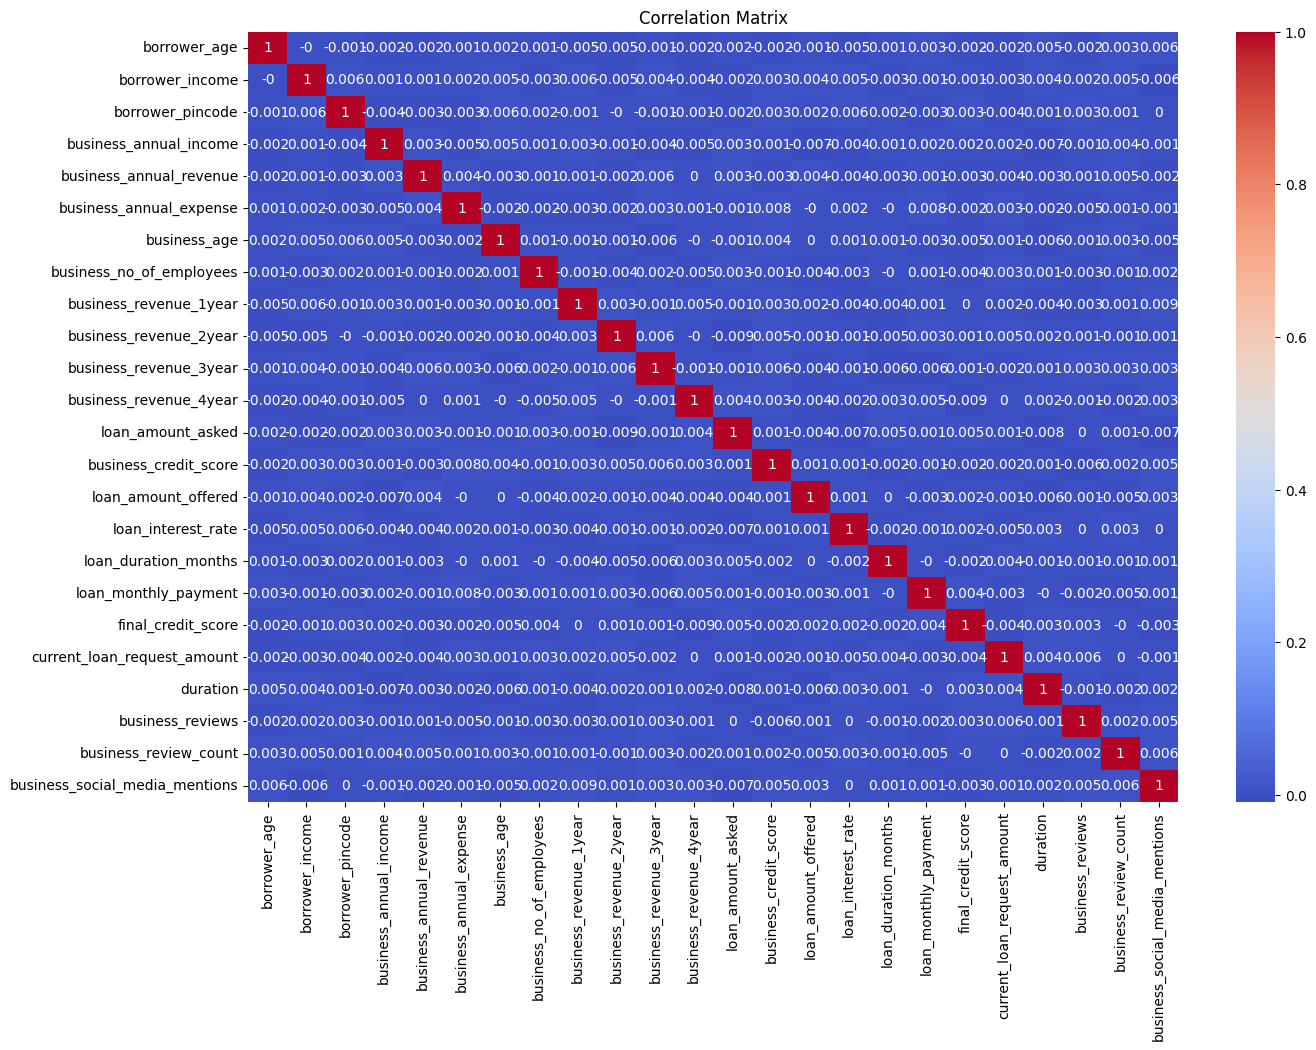

In [ ]:
#list of numerical columns only for correlations purpose
numerical_columns = lending_data_validated.select_dtypes(include=['number']).columns.tolist()

#identify correlationship
correlation_matrix = lending_data_validated[numerical_columns].corr().round(3)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



<Axes: xlabel='borrower_profession', ylabel='count'>

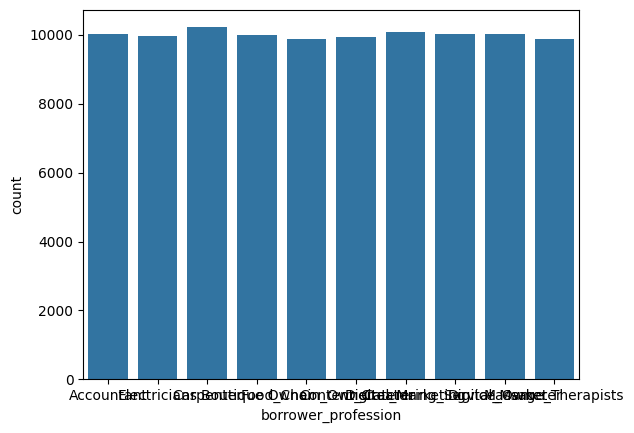

In [ ]:
#validate categorical data
sns.countplot(x='borrower_profession', data=lending_data_validated)


<Axes: xlabel='borrower_age', ylabel='Count'>

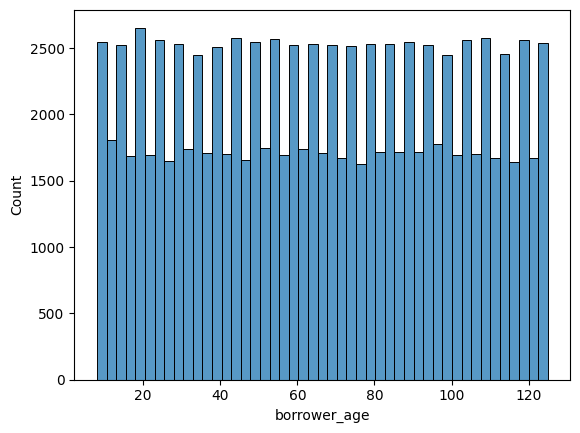

In [ ]:
sns.histplot(x='borrower_age', data=lending_data_validated)

Dropped 31221 rows.
Retained 68749 rows.


<Axes: xlabel='borrower_age', ylabel='Count'>

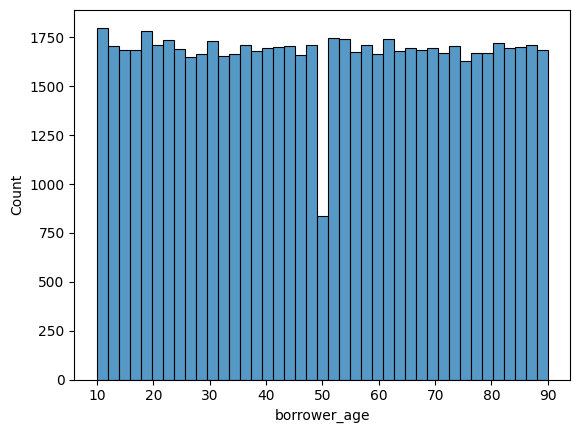

In [ ]:
#Business Logic : Loan will be provided to borrower with age more than 10 and less than 60
lending_data_filtered = lending_data_validated[(lending_data_validated['borrower_age'] >= 10) & (lending_data_validated['borrower_age'] <= 90)]
print(f"Dropped {len(lending_data_validated) - len(lending_data_filtered)} rows.")
print(f"Retained {len(lending_data_filtered)} rows.")

sns.histplot(x='borrower_age', data=lending_data_filtered)

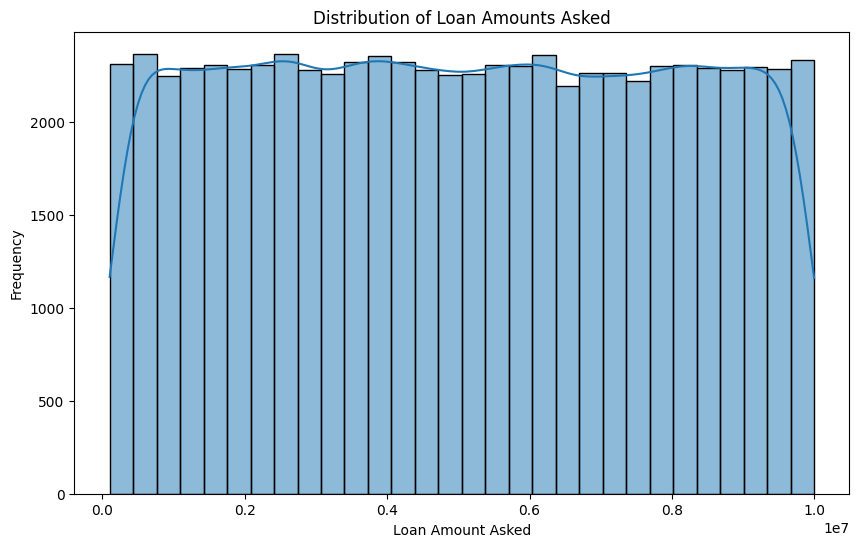

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(lending_data_filtered['loan_amount_asked'], bins=30, kde=True)
plt.title('Distribution of Loan Amounts Asked')
plt.xlabel('Loan Amount Asked')
plt.ylabel('Frequency')
plt.show()


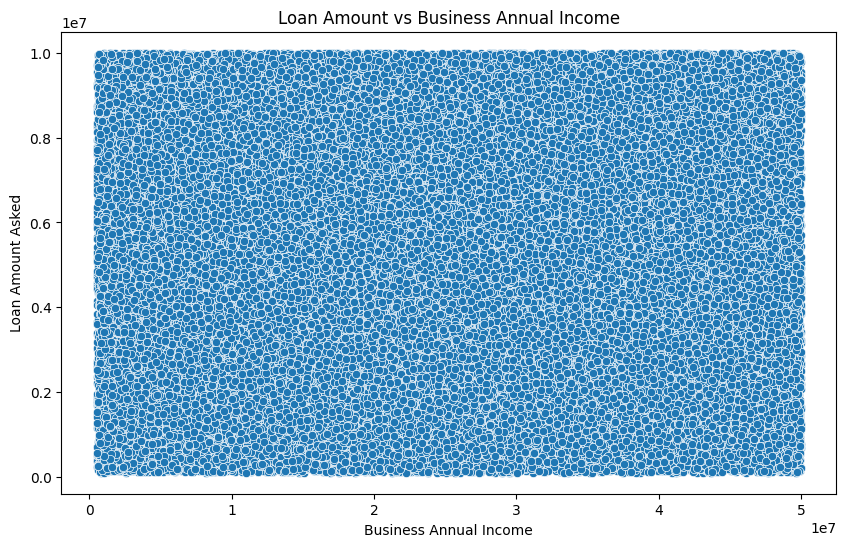

In [ ]:
# Scatter plot of Loan Amount vs Business Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='business_annual_income', y='loan_amount_asked', data=lending_data_filtered)
plt.title('Loan Amount vs Business Annual Income')
plt.xlabel('Business Annual Income')
plt.ylabel('Loan Amount Asked')
plt.show()


In [ ]:
# Group by default status and calculate the mean loan amount and interest rate
default_analysis = lending_data_filtered.groupby('business_default')[['loan_amount_asked', 'loan_interest_rate']].mean()
print(default_analysis)


                  loan_amount_asked  loan_interest_rate
business_default                                       
False                  5.029220e+06           12.478016
True                   5.052372e+06           12.534967
